# Proyecto #1 - Ciencia de Datos en Python

### Importación de Librerias

In [65]:
# Se importan las librerias que se utilizan en el proyecto
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

### Separación de Datos en 2 Datasets

In [4]:
# Se cargan los datos para ser separados posteriormente
df = np.load("data/proyecto_training_data.npy")
print(df.shape)
print(df)

(1460, 6)
[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [5]:
# Se calcula el indice en el que se va partir la data para la validación y pruebas
idx_split = int(df.shape[0] * 0.8)

# Dataset de validacion y pruebas
val_set = df[idx_split:, :] # Se toman los valores a partir del índice (sin incluirlo) - 20% de los datos - validación y pruebas
entrenamiento_dataset = df[:idx_split, :] # Se toman los valores del índice para atrás - 80% de los datos - entrenamiento

# Se separa val_set de tal manera que podamos tener datasets tanto para validación como para pruebas
val_idx_split = int(val_set.shape[0] * 0.5) # 0.5 para obtener la mitad de los datos para validación y la otra mitad para pruebas

val_dataset = val_set[:val_idx_split, :] # Dataset de validación
pruebas_dataset = val_set[val_idx_split:, :] # Dataset de pruebas

### Análisis Exploratorio de Datos

In [6]:
# Calculando la media del dataset
media = np.nanmean(df, axis=0)
print(f"La media del dataset es:\n{media}\n")
# Calculando el valor máximo
max_val = np.nanmax(df, axis=0)
print(f"El valor máximo de cada variable del dataset es:\n{max_val}\n")
# Calculando el valor mínimo
min_val = np.nanmin(df, axis=0)
print(f"El valor mínimo de cada variable del dataset es:\n{min_val}\n")
# Calculando el rango
rango_val = max_val - min_val
print(f"El rango de cada variable del dataset es:\n{rango_val}\n")
# Calculando la desviación estándar
desv_val = np.nanstd(df, axis=0)
print(f"La desviación estándar de cada variable del dataset es:\n{desv_val}\n")

La media del dataset es:
[1.80921196e+05 6.09931507e+00 1.16262671e+03 6.51780822e+00
 1.97126781e+03 7.00499584e+01]

El valor máximo de cada variable del dataset es:
[7.550e+05 1.000e+01 4.692e+03 1.400e+01 2.010e+03 3.130e+02]

El valor mínimo de cada variable del dataset es:
[3.490e+04 1.000e+00 3.340e+02 2.000e+00 1.872e+03 2.100e+01]

El rango de cada variable del dataset es:
[7.201e+05 9.000e+00 4.358e+03 1.200e+01 1.380e+02 2.920e+02]

La desviación estándar de cada variable del dataset es:
[7.94152919e+04 1.38252284e+00 3.86455322e+02 1.62483655e+00
 3.01925588e+01 2.42746394e+01]



### Histograma para cada variable del dataset

c:\Users\Fernando Sagastume\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


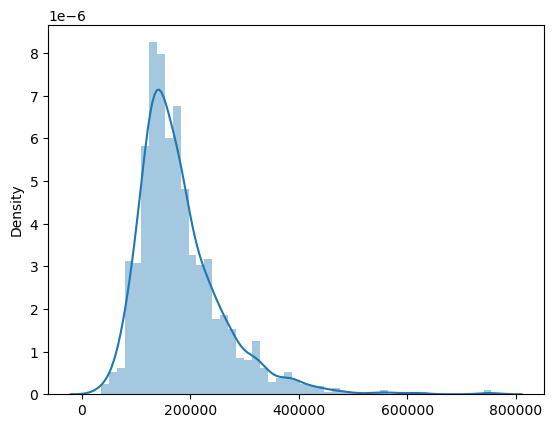

c:\Users\Fernando Sagastume\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


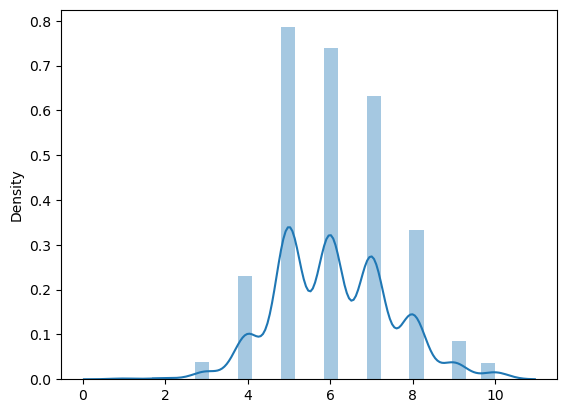

c:\Users\Fernando Sagastume\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


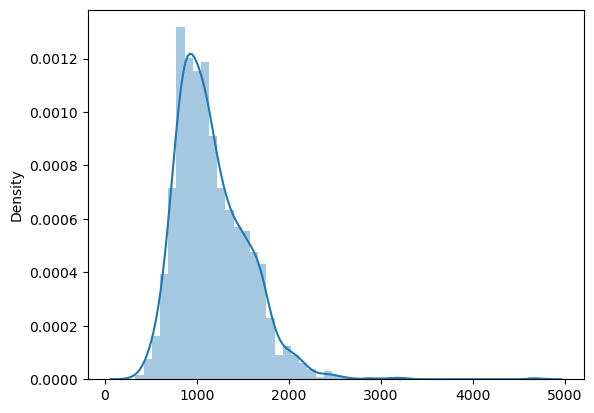

c:\Users\Fernando Sagastume\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


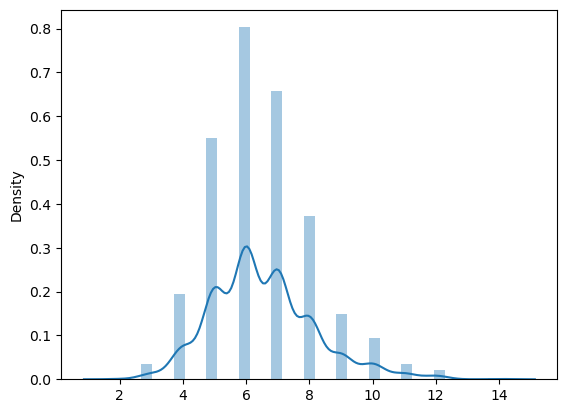

c:\Users\Fernando Sagastume\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


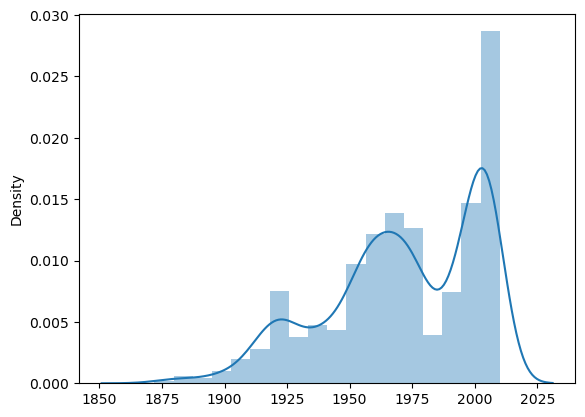

c:\Users\Fernando Sagastume\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


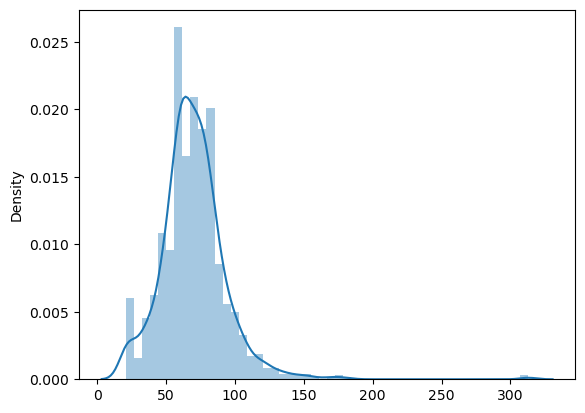

In [7]:
# Se itera sobre cada variable del dataset
for i in range(df.shape[1]):
    sns.distplot(df[:,i])
    plt.show()

### Cálculo de Variable Independiente X
Para este cálculo *X1,X2,X3,X4,X5* son las variables independientes que representan las columnas de *OverallQual, 1stFlrSF, TotRmsAbvGrd, YearBuilt, y LotFrontage*, y la Y la variable dependiente que viene siendo la columna de *SalePrice*.

In [8]:
# Primero se convierte el dataset a un DataFrame, para hacer calculos con "pandas"
dframe = pd.DataFrame(df)
# Luego se agregan nombres a las columnas del dataframe
dframe.columns = ['Y', 'X1', 'X2', 'X3', 'X4', 'X5']

#### Gráfica Xn vs. Y
A continuación se muestran las gráficas de todas las variables independientes contra la dependiente. Viendo las gráficas se puede saber que las que mayor coeficiente de correlación tiene serían: X1 (OverallQual) y X2 (1stFlrSF).

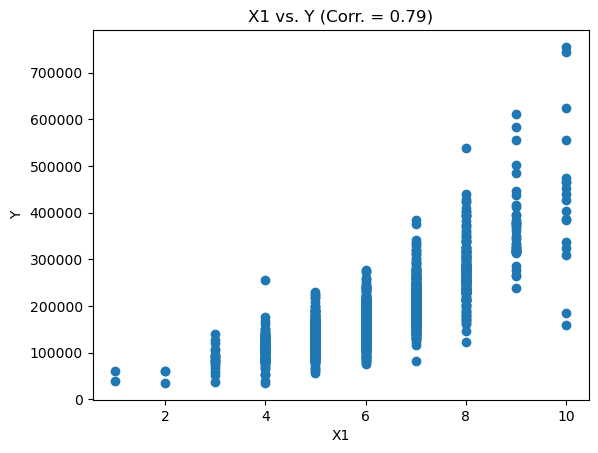

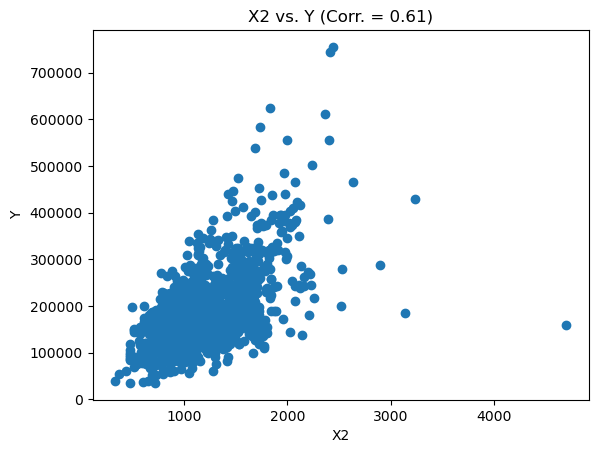

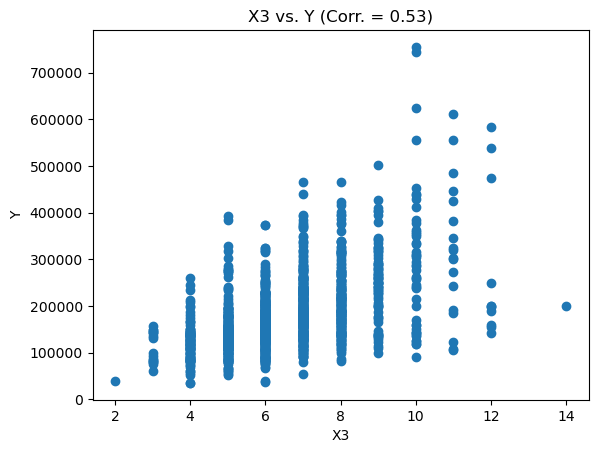

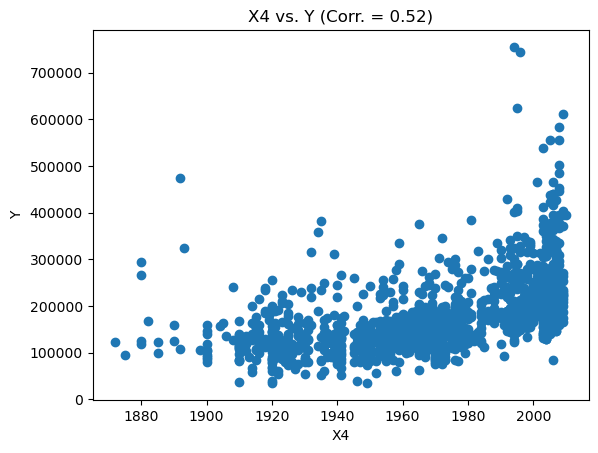

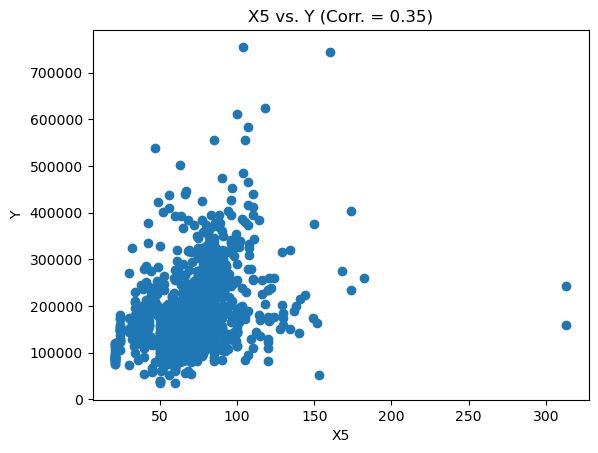

In [9]:
# N indica el número total de variables independientes
N = 5
# Se grafican los resultados del cálculo
for j in range(N):
    X = dframe.iloc[:, j+1]
    Y = dframe.iloc[:, 0]
    plt.scatter(X, Y)
    plt.xlabel(f'X{j+1}')
    plt.ylabel('Y')
    plt.title('X{} vs. Y (Corr. = {:.2f})'.format(j+1, X.corr(Y))) # Se ajusta el coeficiente a dos decimales, por eso el "2f"
    plt.show()
    #Las variables con mayor correlación con la "y" son X1 y X2.

### Función de Regresión Lineal
Función para entrenar un modelo de regresión lineal de una variable y = β0 + β1 ∗ x.

In [10]:
def modRegresionLineal(x, y, epochs, print_error_each, learning_rate):
    # Agregamos una columna de unos para el término independiente
    X = np.c_[x, np.ones_like(x)]
    
    # Inicializamos los parámetros del modelo
    beta = np.zeros((2,1))

    # Seteamos el valor de n que equivale al total de las y
    n = len(y)
    
    for i in range(epochs):

        # Se setea un diccionario para el modelo
        modelo = {}
        # Se setea un diccionario para el error
        error = {}

        # Calculamos la predicción del modelo
        y_pred = np.dot(X, beta)
        
        # Calculamos el error
        error = np.mean((y - y_pred) ** 2)
        
        # Calculamos el gradiente
        gradiente_beta = np.dot(X.T, y_pred - y) / n
        
        # Actualizamos los parámetros
        beta = beta - learning_rate * gradiente_beta
        
        # Se almacena el modelo y el error de cada iteración
        modelo[i] = beta
        error[i] = error

        # Imprimimos el error cada ciertas iteraciones
        if (i+1) % print_error_each == 0:
            mse = np.mean(np.square(error))
            print("Iteración:", i + 1, "Error:", error[i])
    
    return modelo, error


### Función para visualizar el cambio del error


In [11]:
def plot_error(errores):
    plt.plot(range(len(errores)), errores)
    plt.xlabel("#Iteración")
    plt.ylabel("Error")
    plt.title("Evolución del error a través de las iteraciones")
    plt.show()

### Clase para los cálculos de la regresión lineal

In [81]:
class RegresionLineal:

    def __init__(self):
        self.modelos = {}
        self.errores = {}
    
    def entrenar(self, x, y, epochs, print_error_each, learning_rate):
        # Agregamos una columna de unos para la variable independiente
        X = np.column_stack((x, np.ones(x.shape[0])))
        
        # Inicializamos los parámetros del modelo
        beta = np.zeros((2,1))

        # Seteamos el valor de n que equivale al total de las y
        n = len(y)
        
        for i in range(epochs):

            # Calculamos la predicción del modelo
            y_pred = np.dot(X, beta)
            
            # Calculamos el error
            error = np.mean((y - y_pred) ** 2)
            
            # Calculamos el gradiente
            gradiente_beta = np.dot(X.T, y_pred - y) / n
            
            # Actualizamos los parámetros
            beta = beta - learning_rate * gradiente_beta
            
            # Se almacena el modelo y el error de cada iteración
            self.modelos[i] = y_pred
            self.errores[i] = error

            # Imprimimos el error cada ciertas iteraciones
            if (i+1) % print_error_each == 0:
                print("Iteración:", i + 1, "Error:", self.errores[i])

    def plot_errores(self):
        plt.plot(range(len(self.errores)), self.errores.values())
        plt.xlabel("#Iteración")
        plt.ylabel("Error")
        plt.title("Erorres vs. Iteraciones")
        plt.show()
    
    def plot_modelos(self, n, x, y):
        X = np.column_stack((x, np.ones(x.shape[0])))
        plt.plot(X[:, 0], y, 'b.')
        for i in range(0, len(self.modelos), n):
            beta = self.modelos[i]
            y_pred = np.dot(X, beta)
            plt.plot(X[:, 0], y_pred, label=f'Iteración {i}')
        plt.title('Modelos vs. Iteraciones')
        plt.xlabel('X')
        plt.ylabel('Y')
        #plt.legend()
        plt.show()

    def modelo_sklearn(self, x, y):
        # Crear el objeto LinearRegression
        reg = LinearRegression()
        # Entrenar el modelo con los datos
        reg.fit(x.reshape(-1, 1), y)
        # Hacer una predicción
        y_pred = reg.predict(x.reshape(-1, 1))
        return y_pred
    
    def predecir_ambos(manual, sklearn, x):
        # Realizar predicción con modelo entrenado manualmente
        #y_pred_manual = 
        
        # Realizar predicción con modelo de Scikit-learn
        #y_pred_sklearn = 
        
        # Combinar ambas predicciones mediante promedio
        #y_pred_total = np.mean([y_pred_manual, y_pred_sklearn], axis=0)
        
        #return y_pred_manual, y_pred_sklearn, y_pred_combined
        return 0

In [13]:
# Se setean las variables para el entrenamiento con X1
X1_INDEP = dframe["X1"].values
# Se setean las variables para el entrenamiento con X2
X2_INDEP = dframe["X2"].values
# Se setean las variables para el entrenamiento con Y
Y_DEP = dframe["Y"].values

In [62]:
# Se setean los parámetros para las iteraciones de X1
epochs = 50
print_errors = 2
learning_rate = 0.03
n_plot_modelos = 5

In [82]:
# Se setea la clase de regresión lineal
RL_X1 = RegresionLineal()
RL_X2 = RegresionLineal()

Iteración: 2 Error: 3331059966.8411355
Iteración: 4 Error: 1805070112.2184713
Iteración: 6 Error: 1792251664.9001613
Iteración: 8 Error: 1782009286.3930001
Iteración: 10 Error: 1771829581.0890572
Iteración: 12 Error: 1761708034.109066
Iteración: 14 Error: 1751644306.309125
Iteración: 16 Error: 1741638067.38663
Iteración: 18 Error: 1731688988.937304
Iteración: 20 Error: 1721796744.4328976
Iteración: 22 Error: 1711961009.2104454
Iteración: 24 Error: 1702181460.4616165
Iteración: 26 Error: 1692457777.222121
Iteración: 28 Error: 1682789640.3611577
Iteración: 30 Error: 1673176732.5709727
Iteración: 32 Error: 1663618738.3564153
Iteración: 34 Error: 1654115344.0245996
Iteración: 36 Error: 1644666237.674605
Iteración: 38 Error: 1635271109.187242
Iteración: 40 Error: 1625929650.214865
Iteración: 42 Error: 1616641554.1712673
Iteración: 44 Error: 1607406516.2216074
Iteración: 46 Error: 1598224233.272404
Iteración: 48 Error: 1589094403.9615998
Iteración: 50 Error: 1580016728.6486561


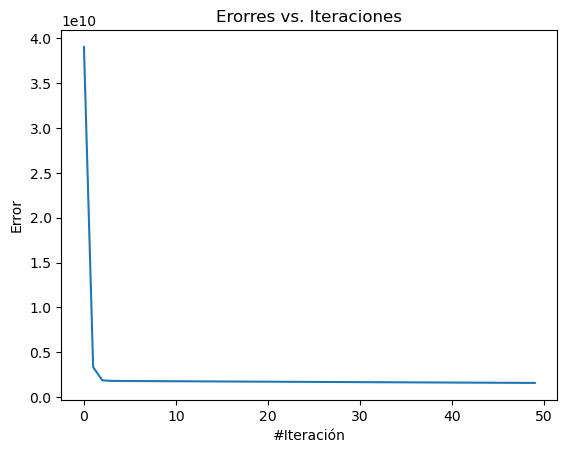

In [83]:
# Se realiza el entrenamiento X2
RL_X1.entrenar(X1_INDEP, Y_DEP, epochs, print_errors, learning_rate)
RL_X1.plot_errores()
#RL_X1.plot_modelos(n_plot_modelos, X1_INDEP, Y_DEP)

In [111]:
# Se setean los parámetros para las iteraciones de X2
epochs_1 = 20
print_errors_1 = 1
learning_rate_1 = 0.001
n_plot_modelos_1 = 5

Iteración: 1 Error: 39039267707.76573
Iteración: 2 Error: 7.910405738398518e+16
Iteración: 3 Error: 1.7799586487836638e+23
Iteración: 4 Error: 4.005171228499047e+29
Iteración: 5 Error: 9.012229908014329e+35
Iteración: 6 Error: 2.027885533007425e+42
Iteración: 7 Error: 4.563043527466869e+48
Iteración: 8 Error: 1.0267525407451601e+55
Iteración: 9 Error: 2.3103456576314602e+61
Iteración: 10 Error: 5.1986207444519596e+67
Iteración: 11 Error: 1.1697668509201602e+74
Iteración: 12 Error: 2.6321490887212707e+80
Iteración: 13 Error: 5.922726242247628e+86
Iteración: 14 Error: 1.3327013386483508e+93
Iteración: 15 Error: 2.9987758768352166e+99
Iteración: 16 Error: 6.747690948228e+105
Iteración: 17 Error: 1.5183306456649882e+112
Iteración: 18 Error: 3.4164693778259974e+118
Iteración: 19 Error: 7.687563340006622e+124
Iteración: 20 Error: 1.7298158880095076e+131


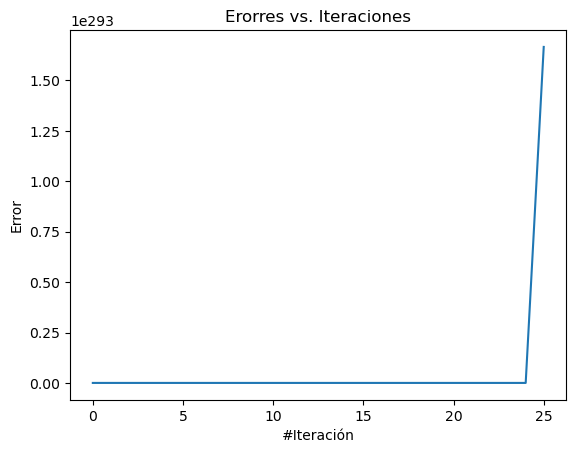

In [112]:
# Se realiza el entrenamiento con X2
RL_X2.entrenar(X2_INDEP, Y_DEP, epochs_1, print_errors_1, learning_rate_1)
RL_X2.plot_errores()
#RL_X1.plot_modelos(n_plot_modelos_1, X2_INDEP, Y_DEP)